# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [8]:
API_TOKEN = "44533df9f3320eaafcd6f4b297edaa697070f36c"
connection.set_access_token(API_TOKEN)

# Strategy Creation

In [9]:
from mean_reversion_bollinger_bands_v2 import MeanReversionBollingerBandsV2 as strategy_cls

In [10]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'data': 'success',
 'cstcId': 123722,
 'strategyId': '09968b2bf22b458f9caf5b31ea6f1c1e'}

In [11]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [12]:
instrument = connection.search_instrument('MSFT', exchange='NASDAQ')[0]['value']
instrument

'NASDAQ:MSFT'

## Setup Parameters

In [13]:
vendor_details = {
    'brokerName': 'ALPACAV2',
    'credentialParameters': {
        'CLIENT_API_KEY': 'PKPR0D9M7AAZSKIPEZW0', 
        'CLIENT_API_SECRET': 'o0Of72gD4jiVrmkq6P3RmggEbhjEhbak0c3RY0Eb'
    }
}

In [14]:
# For RT
broking_details = vendor_details
# for our case, vendor and broker both are same - Alpaca

In [15]:
parameters = {
  'TIMEPERIOD': 8,
  'STD_DEVIATION': 2,
}

## Backtesting

### Start

In [16]:
connection.backtest(
    strategy=strategy, 
    start='2023-05-01 09:15 -0400', 
    end='2023-05-11 15:30 -0400', 
    instrument=['NASDAQ:MSFT', 'NASDAQ:AAPL'], 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    vendor_details=vendor_details
)

Strategy Trades have been deleted successfully 
Setting Strategy Config... Success.
Submitting BACKTESTING job... Success.


### Status

In [18]:
connection.get_backtesting_job_status(strategy)

{'message': 'STOPPED', 'status': 0}

### Logs

In [19]:
logs = connection.get_backtesting_logs(strategy)
print(logs)

[2023-06-10 19:05:41] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-06-10 19:05:41] Sanity checks on cfg successful.
[2023-06-10 19:05:41] Currency set to "USD"
[2023-06-10 19:05:41] Setting up broker connection...
[2023-06-10 19:05:43] Broker connection has been setup successfully.
[2023-06-10 19:05:43] (NASDAQ_EQ) Funds available in client's ABVIRTUALBROKER account is : USD '1000000000.00'
[2023-06-10 19:05:43] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-06-10 19:05:43] Welcome ALGOBULLS VIRTUAL USER!
[2023-06-10 19:05:43] Reading strategy...
[2023-06-10 19:05:43] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2023-05-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2023-05-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      

### Stop

In [20]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


## Profit and Loss Reports

In [21]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,pnl_absolute,pnl_cumulative_absolute
0,NASDAQ,AAPL,2023-05-01 18:47:00,BUY,5,₹,169.31,2023-05-01 18:57:00,SELL,5,₹,169.15,-0.80,-0.80
1,NASDAQ,AAPL,2023-05-01 18:57:00,BUY,5,₹,169.15,2023-05-01 19:02:00,SELL,5,₹,169.65,2.50,1.70
2,NASDAQ,AAPL,2023-05-01 19:02:00,SELL,5,₹,169.65,2023-05-01 19:22:00,BUY,5,₹,169.90,-1.25,0.45
3,NASDAQ,MSFT,2023-05-01 19:17:00,BUY,5,₹,307.26,2023-05-01 19:18:00,SELL,5,₹,307.53,1.35,1.80
4,NASDAQ,MSFT,2023-05-01 19:18:00,BUY,5,₹,307.53,2023-05-01 19:33:00,SELL,5,₹,307.20,-1.65,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,NASDAQ,MSFT,2023-05-11 20:52:00,BUY,5,₹,309.43,2023-05-11 20:53:00,SELL,5,₹,309.77,1.70,48.95
242,NASDAQ,MSFT,2023-05-11 20:53:00,BUY,5,₹,309.77,2023-05-11 21:08:00,SELL,5,₹,309.99,1.10,50.05
243,NASDAQ,MSFT,2023-05-11 21:08:00,BUY,5,₹,309.99,2023-05-11 21:11:00,SELL,5,₹,309.89,-0.50,49.55
244,NASDAQ,MSFT,2023-05-11 21:11:00,BUY,5,₹,309.89,2023-05-12 01:00:00,SELL,5,₹,309.55,-1.70,47.85


## Statistics Reports

### Statistics

In [22]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...
                    Strategy
------------------  ----------
Start Period        2023-05-01
End Period          2023-05-11
Risk-Free Rate      0.0%
Time in Market      85.0%

Cumulative Return   0.0%
CAGR﹪              0.0%

Sharpe              1.54
Prob. Sharpe Ratio  92.73%
Sortino             2.65
Sortino/√2          1.87
Omega               1.39

Max Drawdown        -0.0%
Longest DD Days     3

Gain/Pain Ratio     2.99
Gain/Pain (1M)      -

Payoff Ratio        1.1
Profit Factor       1.39
Common Sense Ratio  1.85
CPC Index           0.85
Tail Ratio          1.33
Outlier Win Ratio   6.17
Outlier Loss Ratio  3.56

MTD                 0.0%
3M                  0.0%
6M                  0.0%
YTD                 0.0%
1Y                  0.0%
3Y (ann.)           0.0%
5Y (ann.)           0.0%
10Y (ann.)          0.0%
All-time (ann.)     0.0%

Avg. Drawdown       -0.0%
Avg. Drawdown Days  0
Recovery Factor     2.73
Ulcer Index         0.0

### Quantstats Full Report

Generating Statistics for already fetched P&L data...


                           Strategy
-------------------------  ----------
Start Period               2023-05-01
End Period                 2023-05-11
Risk-Free Rate             0.0%
Time in Market             85.0%

Cumulative Return          0.0%
CAGR﹪                     0.0%

Sharpe                     1.54
Prob. Sharpe Ratio         92.73%
Smart Sharpe               1.54
Sortino                    2.65
Smart Sortino              2.64
Sortino/√2                 1.87
Smart Sortino/√2           1.87
Omega                      1.39

Max Drawdown               -0.0%
Longest DD Days            3
Volatility (ann.)          0.0%
Calmar                     99.56
Skew                       0.0
Kurtosis                   0.0

Expected Daily %           0.0%
Expected Monthly %         0.0%
Expected Yearly %          0.0%
Kelly Criterion            15.52%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.0%
Expected Shortfall (cVaR)  -0.0%

Max Consecutive Wins       9
Max Consecuti

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2023-05-08,2023-05-10,2023-05-11,3,-1.800000e-06,-1.620000e-06
2,2023-05-02,2023-05-03,2023-05-04,2,-1.770000e-06,-1.700000e-06
3,2023-05-01,2023-05-01,2023-05-02,0,-7.400000e-07,-6.450000e-07
4,2023-05-01,2023-05-01,2023-05-01,0,-6.050000e-07,-2.100000e-07
5,2023-05-04,2023-05-04,2023-05-05,0,-3.300000e-07,-2.650000e-07


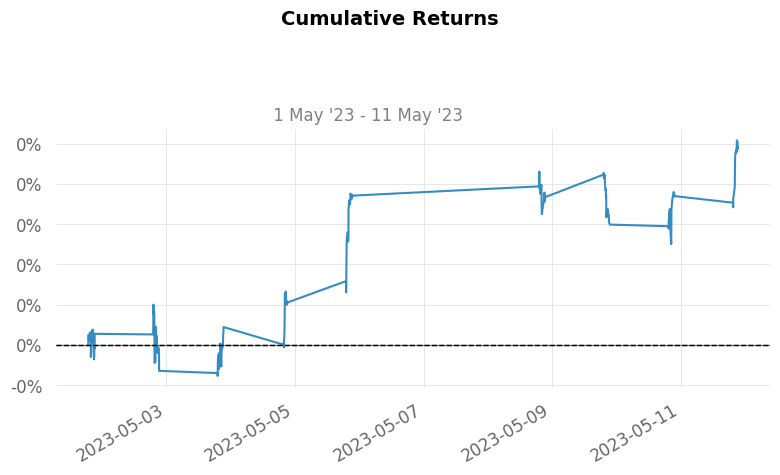

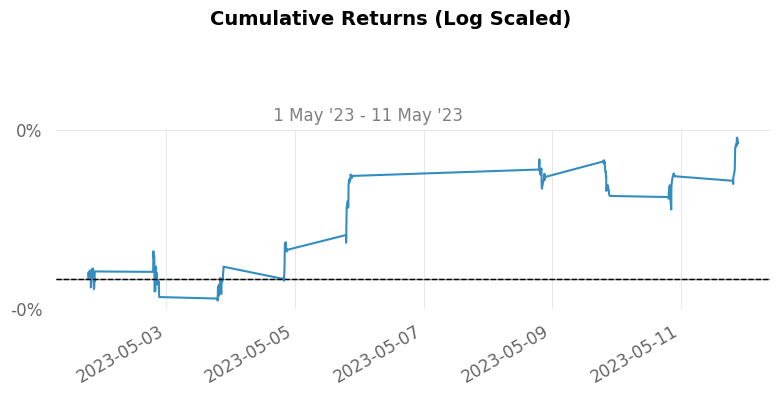

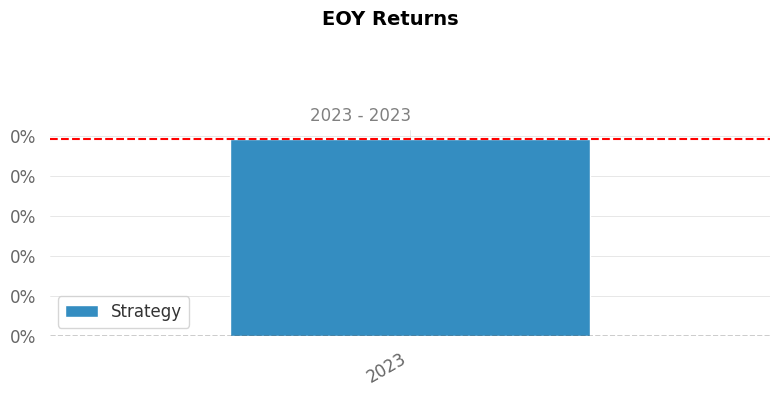

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/_plotting/core.py:355: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  _sns.kdeplot(returns, color='black', linewidth=1.5)


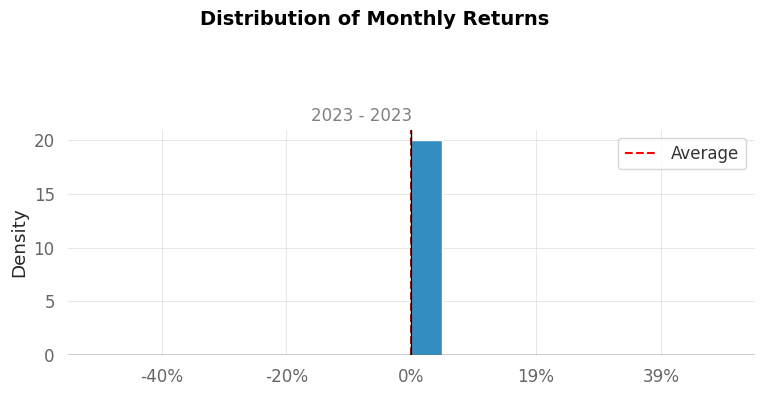

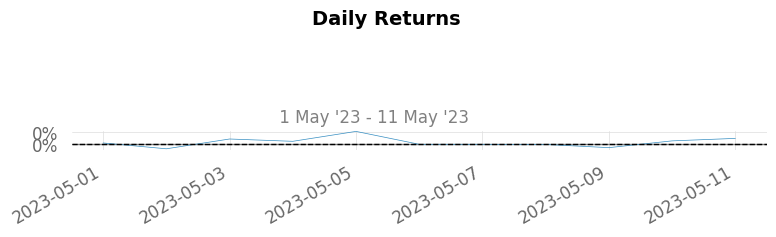

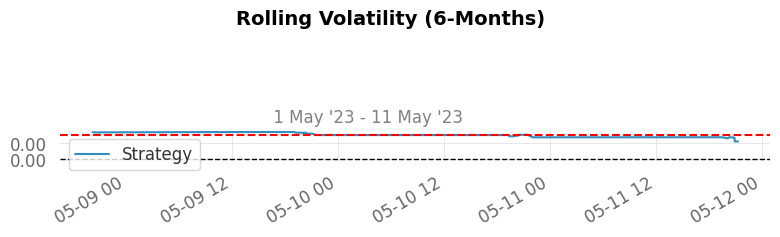

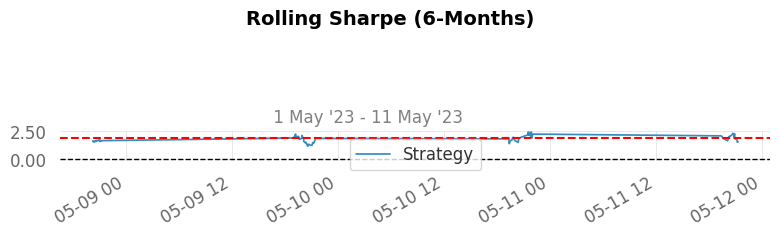

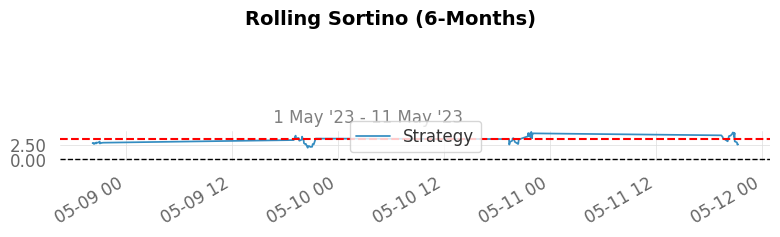

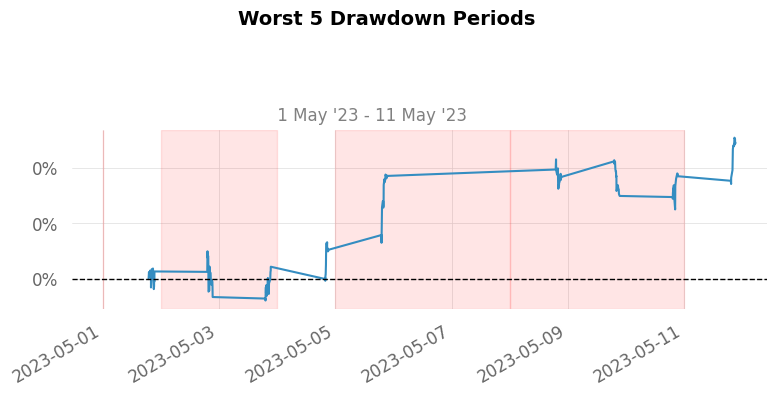

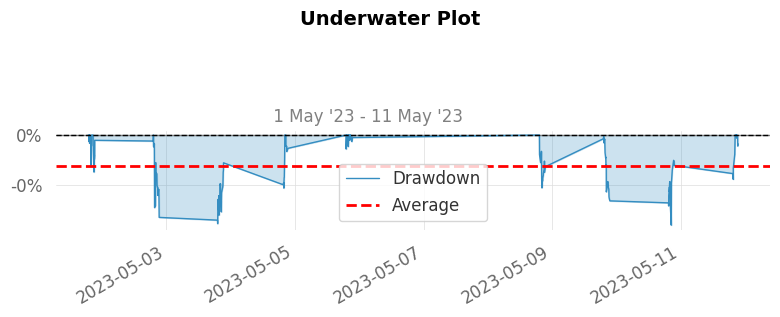

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


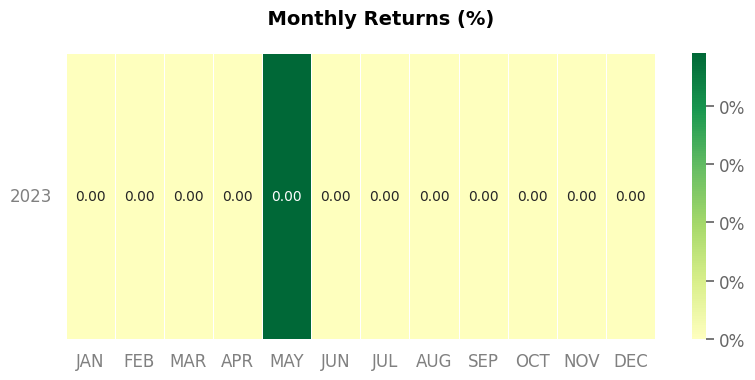

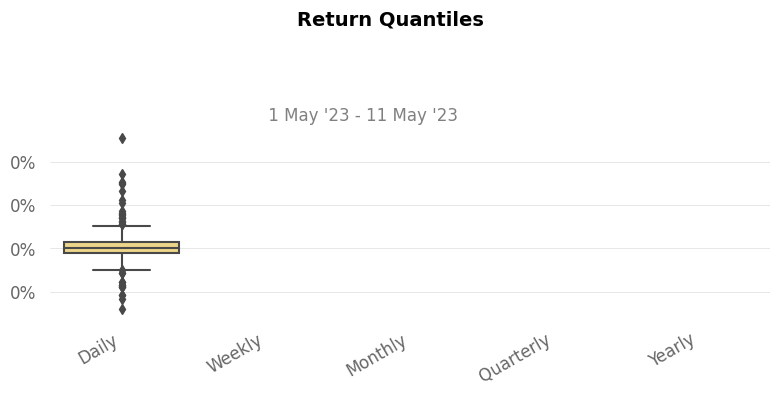

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/_plotting/core.py:355: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  _sns.kdeplot(returns, color='black', linewidth=1.5)
/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [23]:
connection.get_backtesting_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

## Order History

In [ ]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 -0400', 
    end='15:00 -0400', 
    instruments='NASDAQ:NVDA', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    vendor_details=vendor_details
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Papertrading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Papertrading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Papertrading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

## Realtrading

### Start

In [ ]:
connection.realtrade(
    strategy=strategy, 
    start='9:15 -0400', 
    end='15:00 -0400',  
    instruments='NASDAQ:AAPL', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_id=73,
    broking_details=broking_details
)

### Status

In [ ]:
connection.get_realtrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Realtrading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Realtrading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Realtrading)

In [ ]:
order_history = connection.get_realtrading_report_order_history(strategy)
print(order_history)